<a href="https://colab.research.google.com/github/ABBAS-37405/PYTHON-AND-DATA-SCIENCE/blob/main/Practice_of_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOMOTE
SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling method that addresses imbalanced datasets by generating synthetic samples for the minority class. Instead of simply duplicating existing minority class examples, SMOTE creates new, synthetic examples that are combinations of existing minority class samples and their nearest neighbors. This helps to prevent overfitting that can occur with simple oversampling and provides a more diverse set of training data for the minority class, leading to better model performance.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Original class distribution: Counter({0: 9262, 1: 738})


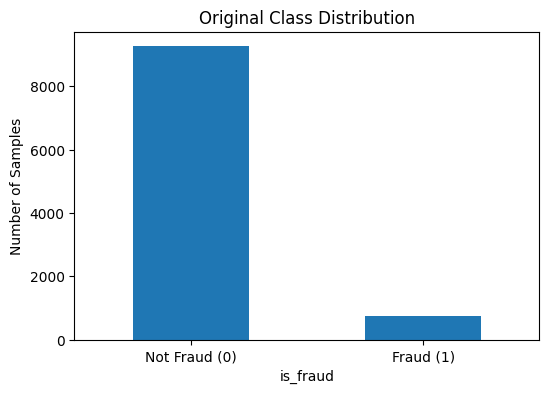

In [8]:
# Load your dataset
df = pd.read_csv("/content/drive/My Drive/Datasets/credit_fraud_data.csv")

# Separate features and target
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

# Show original class distribution
print("Original class distribution:", Counter(y))

# Visualize original class distribution
plt.figure(figsize=(6,4))
y.value_counts().plot(kind='bar', title='Original Class Distribution')
plt.xticks([0,1], ['Not Fraud (0)', 'Fraud (1)'], rotation=0)
plt.ylabel("Number of Samples")
plt.show()

# Split the data before applying SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote =SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Show new class distribution
print("After SMOTE class distribution:", Counter(y_train_resampled))

After SMOTE class distribution: Counter({0: 7410, 1: 7410})


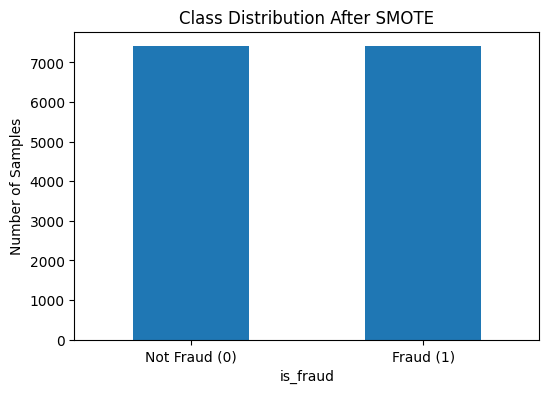

In [11]:
# Visualize new class distribution
plt.figure(figsize=(6,4))
y_train_resampled.value_counts().plot(kind='bar', title='Class Distribution After SMOTE')
plt.xticks([0,1], ['Not Fraud (0)', 'Fraud (1)'], rotation=0)
plt.ylabel("Number of Samples")
plt.show()